# <center> The Last Home Assignment</center> 

<img src='https://www.film.ru/sites/default/files/images/300-2006-01.jpg' width=500>
    
# <center> or <br> sample assignment to help you with a group project</center> 

#### Grading policy: 

Grade for Task 1 => grade for HA5 (max 10 points). <br>
Grade for Task 2 => grade for HA6 (max 13 points). <br>
Grade for Task 3 => grade for HA7 (max 10 points). <br>
Grade for Task 4 => grade for HA8 (max 13 points). <br>
Bonus task in the end [+ 5 points]<br>

This final homework assignment will be a quick example of your research / industry project. It only covers a small part of what you can do, but let's at least consolidate the knowledge you have and even learn new information on which graphs you can plot.

In [1]:
# in case if you didn't install this libraries on week 9 + bubbly
!pip install plotly-express
!pip install nbformat==4.2.0
!pip install plotly
!pip install bubbly

In [2]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import plotly_express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import seaborn as sns
from tqdm import tqdm
init_notebook_mode(connected=True)
%config InlineBackend.figure_format = 'svg'

Each project starts with statements of the purpose (goal), objectives, and the research hypotheses. 

The topic of our mini-research project will be **' The comparative analysis of the countries on the index of happiness'**.
The  **goal** - to compare key indicators reflecting the level of happiness of the population of different countries, and the dynamics of their change for 2015-2020. 

The **objectives**: 
* To gather the data for 2015-2020 on the happiness level indices. 
* To compare the descriptive statistics across the countries and time periods.
* To visualize the data in order to draw the additional conclusion for exploratory data analysis.
* To test the statistical hypotheses on differences between most distinct continents based on selected indicators. 

**Research hypothesis**: There is no significant difference in the level of happiness across different countries on average. 

**Task 1.** EDA.Part 1

In a given data set we observe the reported statistics on the happiness index across different countries. It covers 5 years: 2015 - 2019 years. 

You can find additional descriptions on context and content here: https://www.kaggle.com/unsdsn/world-happiness

Read file ```happiness_index.csv``` into a DataFrame using pandas. The columns:

* ```Country``` - Name of the country.

* ```Happiness Rank``` - Rank of the country based on the Happiness Score.

* ```Happiness Score``` - A metric measured in 2015 by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest."

* ```GDP``` - The extent to which GDP per capita contributes to the calculation of the Happiness Score.

* ```Life expectancy``` - The extent to which Life expectancy contributed to the calculation of the Happiness Score.

* ```Freedom``` - The extent to which Freedom contributed to the calculation of the Happiness Score.

* ```Trust``` - The extent to which Perception of Government Corruption contributes to Happiness Score.

1.  As far as not each country was recorded each year, you need to filter this table and leave only countries without missing recording for each year (2015, 2016, 2017, 2018, 2019).  *Hint*: you need to check first how many recordings there are for each country in a data set. For instance, think about how you can use the result of ```value_counts()``` and ```isin``` to write a condition for filtering. 

Write a conclusion about how many countries there were, how many of them you excluded from the analysis, and why.
Next tasks you need to complete with a filtered data set.

2. If you look at the table, you will notice that it is sorted by year and then by happiness rank. It would be easier to view all the records for each country and year at once so that you can track the evolution of the index over time. Sort this table by both country name and year. If you observe, after applying the ```.head(15)``` method, the beginning of the dataset with Afghanistan, Albania and Algeria for 2015-2019, that is correct.

In [3]:
data = pd.read_csv('happiness_index.csv')

In [4]:
# Task 1
filtered = data.groupby('Country').filter(lambda x : len(x)>4)
filtered.head()

Country  Happiness Rank  Happiness Score  Year      GDP  \
0  Switzerland               1            7.587  2015  1.39651   
1      Iceland               2            7.561  2015  1.30232   
2      Denmark               3            7.527  2015  1.32548   
3       Norway               4            7.522  2015  1.45900   
4       Canada               5            7.427  2015  1.32629   

   Life Expectancy  Freedom    Trust  
0          0.94143  0.66557  0.41978  
1          0.94784  0.62877  0.14145  
2          0.87464  0.64938  0.48357  
3          0.88521  0.66973  0.36503  
4          0.90563  0.63297  0.32957

There were initially 158 countries, but after the filtration I have excluded 153 countries becuase for some states there was no data for some years in some dimensions. So, in my analysis there are 5 countries that suited parameters of the filtration. 

In [5]:
# Task 2
data = filtered.sort_values(["Country", "Year"], ascending = (True, True))
data.head(15)

Country  Happiness Rank  Happiness Score  Year       GDP  \
152  Afghanistan             153            3.575  2015  0.319820   
311  Afghanistan             154            3.360  2016  0.382270   
455  Afghanistan             141            3.794  2017  0.401477   
614  Afghanistan             145            3.632  2018  0.332000   
779  Afghanistan             154            3.203  2019  0.350000   
94       Albania              95            4.959  2015  0.878670   
266      Albania             109            4.655  2016  0.955300   
423      Albania             109            4.644  2017  0.996193   
581      Albania             112            4.586  2018  0.916000   
732      Albania             107            4.719  2019  0.947000   
67       Algeria              68            5.605  2015  0.939290   
195      Algeria              38            6.355  2016  1.052660   
367      Algeria              53            5.872  2017  1.091864   
553      Algeria              84            5.295  2018  0.979000   
713      Algeria              88            5.211  2019  1.002000   

     Life Expectancy   Freedom     Trust  
152         0.303350  0.234140  0.097190  
311         0.173440  0.164300  0.071120  
455         0.180747  0.106180  0.061158  
614         0.255000  0.085000  0.036000  
779         0.361000  0.000000  0.025000  
94          0.813250  0.357330  0.064130  
266         0.730070  0.318660  0.053010  
423         0.731160  0.381499  0.039864  
581         0.790000  0.419000  0.032000  
732         0.874000  0.383000  0.027000  
67          0.617660  0.285790  0.173830  
195         0.618040  0.210060  0.161570  
367         0.617585  0.233336  0.146096  
553         0.687000  0.077000  0.135000  
713         0.785000  0.086000  0.114000

The below code calculates the difference between 2015 and 2019 happiness scores for each country.
Sort the dictionary by score difference (instead of sorting by country name) and select the 2 countries with the largest positive difference and the 2 countries with the largest negative score difference. Add these 4 countries and Russia to the ``` sample ``` variable - these countries will be our subset for further analysis.

Note, that this code will not work until you filter your data set and leave only the countries with the recordings for each out of 5 years. 

In [6]:
stata_dict = {}
for country in tqdm(data.Country.unique()):
    stata = data[data.Country == country]['Happiness Score']
    diff_2019_2015 = stata.iloc[4] - stata.iloc[0] 
    stata_dict[country] = diff_2019_2015

100%|██████████| 141/141 [00:00<00:00, 1956.84it/s]


In [7]:
sorted_stata = dict(sorted(stata_dict.items(), key=lambda x:x[1]))
print(list(sorted_stata.items())[:2])
print(list(sorted_stata.items())[-2:])

[('Venezuela', -2.1029999999999998), ('Zambia', -1.0219999999999994)]
[('Ivory Coast', 1.2890000000000001), ('Benin', 1.5430000000000001)]


In [8]:
sample = ['Russia', 'Venezuela', 'Zambia', 'Ivory Coast', 'Benin'] #YOUR 4 COUNTRIES THERE

Plot the pivot table with a code below and draw a conclusion on the differences among these countries in GDP per capita.

In [9]:
data[data.Country.isin(sample)].pivot_table(columns='Country', index='Year', values='GDP')

Country     Benin  Ivory Coast    Russia  Venezuela    Zambia
Year                                                         
2015     0.286650     0.465340  1.137640   1.044240  0.470380
2016     0.394990     0.555070  1.232280   1.133670  0.612020
2017     0.431085     0.603049  1.281778   1.128431  0.636407
2018     0.378000     0.541000  1.151000   0.996000  0.562000
2019     0.393000     0.569000  1.183000   0.960000  0.578000

What year was the most economically successful for these countries in 2015-2019?

It can be outlined from the pivot table that the year 2017 was the most successful in economic terms for these countries. 

**Task 2.** EDA. Part 2: plots

Let's make some plots to visualize the data. Run the code below and interpret the graph.

In [10]:
df = data[data.Country.isin(sample)].groupby(['Year','Country'], as_index=False)['Happiness Score'].sum()
px.line(df, 
        title='The dynamics of Happiness Score',
        x='Year', 
        y='Happiness Score', 
        color='Country')

* What is the name of this type of graph?
* In which countries in your sample are there positive and negative trends? 
* What does this mean in terms of the happiness index? 
* [bonus 1 point] Recall or try to find out what events in these countries can positively affect the happiness index?

* What kind of distributions are for each variable (or groups of variables)?
* Are there any linear trends in the interrelations between Happiness Score in a pair with other variables (according to the scatter plots)?

1) This is a line graph
2) Ivory Coast, Benin have positive trends, Venezuela and Zambia have clear negative trends. Russia is a special case where there was positive trend untill the 2017, but then the trend made turn and became negative.
3) Trends are the reflection of combination of parameters by which Hapiness index is calculated, so it means that where the trends are positive there is an increase in values of such parameters and vice versa in negative trends.
4) A) Ohio State University found out the way how to fight illegal cocoa farms in Ivory Coast, what will positively reflect on GDP of this country. B) Malaria drug inovation decreases the probability not to survive this desease in Benin. 
5) Hapiness score and year
6) There is a correlation between life expectancy, economic performance and the level of hapiness of nations. 

Take a look at histograms and scatter charts for key indicators across the entire dataset.

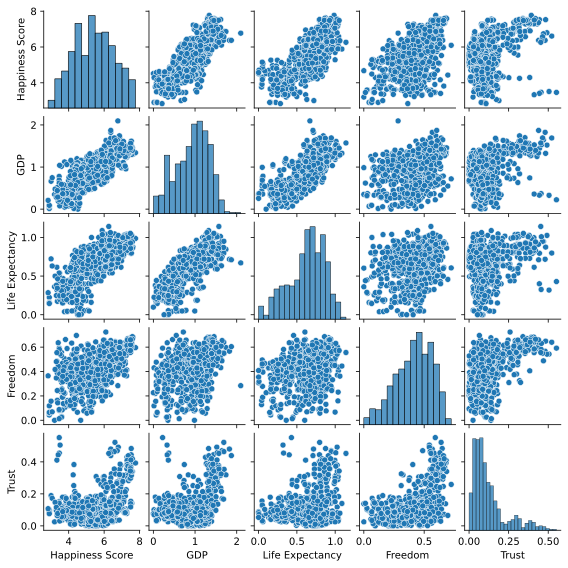

In [15]:
sns.pairplot(data[['Happiness Score', 
                  'GDP',
                  'Life Expectancy', 
                  'Freedom',
                  'Trust', 
                  # 'Generosity' ???? There is no such column so it can't be used
                  ]], height=1.6);

Key indicators across the data set are: Happiness score, GDP, Life expectancy, Freedom, Trust

Let's check your assumptions on linear trend and compute the correlation matrix. Run the code below. 

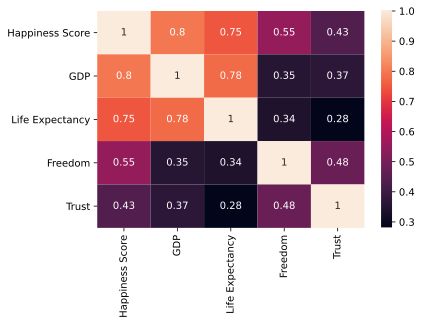

In [16]:
sns.heatmap(data[['Happiness Score', 
                  'GDP',
                  'Life Expectancy', 
                  'Freedom',
                  'Trust', 
                  # 'Generosity', ??? Still no column 
                  'Country']].corr(), annot=True);

* Which variables are strongly correlated? Pick top 3 of them. 
* [bonus 1 point] Can you support by any evidence that exists there exists not only correlation, but causality between each of these 3 pairs of variables? 

1) A) Hapiness score and GDP B) Life expectancy and GDP C) Life expectancy and Hapiness score. 
2) High level of GDP means healthy life style which increases life expectancy. High level of GDP means fewer fears and worries about basic needs such as food, water, housing for people what positively affects Hapiness score.

Look at the correlation matrix on the basis of your sample countries (run the code):

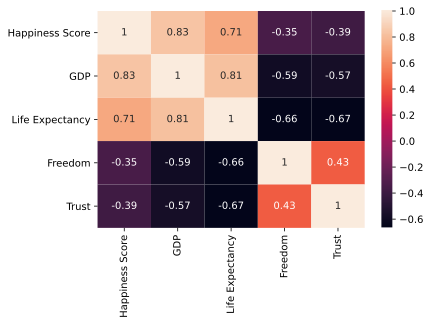

In [17]:
sns.heatmap(data[data.Country.isin(sample)][['Happiness Score', 
                                             'GDP',
                                             'Life Expectancy', 
                                             'Freedom',
                                             'Trust', 
                                             # 'Generosity', 
                                             'Country']].corr(), annot=True);

* Compare the correlation matrices above. What values differ the most?
* Which matrix do you think is more reliable for inferring the general relationship between pairs of these variables? Why?
* Interpret the changes in the variables with the greatest negative correlation if the unit value changes by 1 unit.

1) Freedom and Trust differ the most
2) The first one, becuase variables better suit the aim of research


Let's make a new variable ```Happiness Level```, which will include the level of happiness: low, medium or high. 

In [27]:
data['Happiness Level'] = pd.cut(data['Happiness Score'], 3, labels=["low", "medium", "high"])

Interpret the plot below in your own words:

In [31]:
sns.pairplot(data[['Happiness Score', 
                  'GDP',
                  'Life Expectancy', 
                  'Freedom',
                  'Trust', 
                  #'Generosity', 
                  'Happiness Level']], 
             height=1.6, 
             hue="Happiness Level");

Some parameters affect hapiness score more than others.

Let's use an additional dataset of population size for each year and country and look at the dynamics of change. 

In [33]:
from bubbly.bubbly import bubbleplot 

gapminder = pd.read_csv('gapminder.tsv', delimiter='\t')

figure = bubbleplot(dataset=gapminder, 
                    x_column='gdpPercap', 
                    y_column='lifeExp', 
                    bubble_column='country', 
                    time_column='year', 
                    size_column='pop', #population
                    color_column='continent', 
                    x_title="GDP per Capita", 
                    y_title="Life Expectancy", 
                    title='Gapminder Global Indicators',
                    x_logscale=True, scale_bubble=3, height=650)

iplot(figure, config={'scrollzoom': True})

Please, interpret the results and what kind of conclusions you can add into your analysis. 

It can be inferred from the analysis that GDP growth correlates with life expectancy. The higher GDP - the higher life expectancy. Throughout the timeframe it is clear that there is a tendency in growth of both GDP and life expectancy. 

Run the code:

In [34]:
fig = make_subplots(rows=1, cols=1, specs=[[{'type':'domain'}]])
continents_population = dict(gapminder[gapminder.year == 2007].groupby('continent')['pop'].agg('sum'))
labels = [x for x in continents_population]

fig.add_trace(go.Pie(labels=labels, pull=[0, 0, 0, 0, 0.1], 
                     values=[value for key, value in continents_population.items()], 
                     name="Ratio"), 1, 1)
fig.update_layout(
    title_text="Ratio of population across differentcontinents",
    colorway=['rgb(69, 135, 24)', 'rgb(136, 204, 41)', 'rgb(204, 204, 41)', 
              'rgb(235, 210, 26)', 'rgb(209, 156, 42)'])
fig.show()

* What is the kind of this graph?
* What are the ratios for the continents?

1) This graph is a pie chart 
2) Asia 0.61, Africa 0.149, Americas 0.144, Europe 0.938, Oceania 0.0393

Change the title and the labels of x and y-axes on this plot correctly: 

In [35]:
figure = bubbleplot(dataset=data, 
                    x_column='Happiness Score', 
                    y_column='GDP', 
                    bubble_column='Country', 
                    time_column='Year', 
                    color_column='Happiness Level', 
                    x_title="None", 
                    y_title="None", 
                    title='None',
                    scale_bubble=1.5)

iplot(figure, config={'scrollzoom': True})

**Task 3.** Web parsing and scraping.

It is reasonable to note that we can search for up-to-date information for 2020 and supplement the data.

Follow the link and find a report for 2020 there: https://en.wikipedia.org/wiki/World_Happiness_Report 

In [19]:
import requests
from bs4 import BeautifulSoup

You already know this function from our Week 9 pratical class, but pay your attention to a new line:

```python3
df = pd.read_html(str(content))[0]
```

It converts our structured document tree with HTML tags into a DataFrame. 

On a provided Wiki page, find an HTML tag using Developer Tools, which is for the table with results on the 2020 year, and replace it instead of ```'HTML TAG HERE'```. 

In [26]:
def download_table_from_page():
    url = 'https://en.wikipedia.org/wiki/World_Happiness_Report'
    response = requests.get(url)
    tree = BeautifulSoup(response.content, 'html.parser')
    # find the first matching table for this pattern
    content = tree.find('table', {'class' : 'wikitable sortable'})
    # convert structured html doc into a DataFrame
    df = pd.read_html(str(content))[0]
    
    return df

download_table_from_page()

Overall rank         Country or region  Score  GDP per capita  \
0               1                   Finland  7.809           1.285   
1               2                   Denmark  7.646           1.327   
2               3               Switzerland  7.560           1.391   
3               4                   Iceland  7.504           1.327   
4               5                    Norway  7.488           1.424   
..            ...                       ...    ...             ...   
148           149  Central African Republic  3.476           0.041   
149           150                    Rwanda  3.312           0.343   
150           151                  Zimbabwe  3.299           0.426   
151           152               South Sudan  2.817           0.289   
152           153               Afghanistan  2.567           0.301   

     Social support  Healthy life expectancy  Freedom to make life choices  \
0             1.500                    0.961                         0.662   
1             1.503                    0.979                         0.665   
2             1.472                    1.041                         0.629   
3             1.548                    1.001                         0.662   
4             1.495                    1.008                         0.670   
..              ...                      ...                           ...   
148           0.000                    0.000                         0.293   
149           0.523                    0.572                         0.604   
150           1.048                    0.375                         0.377   
151           0.553                    0.209                         0.066   
152           0.356                    0.266                         0.000   

     Generosity  Perceptions of corruption  
0         0.160                      0.478  
1         0.243                      0.495  
2         0.269                      0.408  
3         0.362                      0.145  
4         0.288                      0.434  
..          ...                        ...  
148       0.254                      0.028  
149       0.236                      0.486  
150       0.151                      0.081  
151       0.210                      0.111  
152       0.135                      0.001  

[153 rows x 9 columns]

So, it will be nice to join the report on the 2020 year with the reports on 2015-2019 in order to have a full data set for your analysis.
However, there are at least three problems:
1) The names of the columns differ
2) The content of columns differs
3) Some needed columns are missing, for instance, with a year. 

We will do the tasks to cope with it. 

1. Compare the columns from the data set on 2020 and data on 2015-2019. Rename the selected columns in place in a data set 2020 to the way they named for data 2015-2019: Overall rank => Happiness Rank, Country or region => Country, Score => Happiness Score, etc. till the end. Note, that you should rename only the columns which are present in both tables and differ in names (for example, Social support should not be included in rename method, because Social support is present only in the report 2020). 

2. Create a column Year and fill it with 2020 values for each row. There are several possible ways how you can do it, try to find out the easiest one. 

3. The code is provided for this task. Concatenate two data sets. Drop the extra column Social support. 

4. Check the missing values. For the column, Happiness Level fill in the missing values according to the value of Happiness Score (see a method ```pd.cut()``` used above). 

In [52]:
data_2020 = download_table_from_page()

#YOUR CODE HERE

In [53]:
# Task 1
data_2020.rename(
    columns=({ 'Overall rank': 'Happiness Rank', 'Country or region': 'Country', 'Score': 'Happiness Score', 
              'GDP per capita': 'GDP', 'Healthy life expectancy': 'Life Expectancy', 
              'Freedom to make life choices': 'Freedom', 'Perceptions of corruption': 'Trust'}), 
    inplace=True,
)
data_2020

Happiness Rank                   Country  Happiness Score    GDP  \
0                 1                   Finland            7.809  1.285   
1                 2                   Denmark            7.646  1.327   
2                 3               Switzerland            7.560  1.391   
3                 4                   Iceland            7.504  1.327   
4                 5                    Norway            7.488  1.424   
..              ...                       ...              ...    ...   
148             149  Central African Republic            3.476  0.041   
149             150                    Rwanda            3.312  0.343   
150             151                  Zimbabwe            3.299  0.426   
151             152               South Sudan            2.817  0.289   
152             153               Afghanistan            2.567  0.301   

     Social support  Life Expectancy  Freedom  Generosity  Trust  
0             1.500            0.961    0.662       0.160  0.478  
1             1.503            0.979    0.665       0.243  0.495  
2             1.472            1.041    0.629       0.269  0.408  
3             1.548            1.001    0.662       0.362  0.145  
4             1.495            1.008    0.670       0.288  0.434  
..              ...              ...      ...         ...    ...  
148           0.000            0.000    0.293       0.254  0.028  
149           0.523            0.572    0.604       0.236  0.486  
150           1.048            0.375    0.377       0.151  0.081  
151           0.553            0.209    0.066       0.210  0.111  
152           0.356            0.266    0.000       0.135  0.001  

[153 rows x 9 columns]

In [54]:
# Task 2
data_2020['Year'] = pd.Series([2020 for x in range(len(data_2020.index))])
data_2020

Happiness Rank                   Country  Happiness Score    GDP  \
0                 1                   Finland            7.809  1.285   
1                 2                   Denmark            7.646  1.327   
2                 3               Switzerland            7.560  1.391   
3                 4                   Iceland            7.504  1.327   
4                 5                    Norway            7.488  1.424   
..              ...                       ...              ...    ...   
148             149  Central African Republic            3.476  0.041   
149             150                    Rwanda            3.312  0.343   
150             151                  Zimbabwe            3.299  0.426   
151             152               South Sudan            2.817  0.289   
152             153               Afghanistan            2.567  0.301   

     Social support  Life Expectancy  Freedom  Generosity  Trust  Year  
0             1.500            0.961    0.662       0.160  0.478  2020  
1             1.503            0.979    0.665       0.243  0.495  2020  
2             1.472            1.041    0.629       0.269  0.408  2020  
3             1.548            1.001    0.662       0.362  0.145  2020  
4             1.495            1.008    0.670       0.288  0.434  2020  
..              ...              ...      ...         ...    ...   ...  
148           0.000            0.000    0.293       0.254  0.028  2020  
149           0.523            0.572    0.604       0.236  0.486  2020  
150           1.048            0.375    0.377       0.151  0.081  2020  
151           0.553            0.209    0.066       0.210  0.111  2020  
152           0.356            0.266    0.000       0.135  0.001  2020  

[153 rows x 10 columns]

In [59]:
# Task 3
new_df = pd.concat([data, data_2020])
new_df.drop(columns=['Social support', 'Generosity'], inplace=True) # since there is no such a Column as Generosity in 1 table
new_df

Country  Happiness Rank  Happiness Score  Year  \
152               Afghanistan             153            3.575  2015   
311               Afghanistan             154            3.360  2016   
455               Afghanistan             141            3.794  2017   
614               Afghanistan             145            3.632  2018   
779               Afghanistan             154            3.203  2019   
..                        ...             ...              ...   ...   
148  Central African Republic             149            3.476  2020   
149                    Rwanda             150            3.312  2020   
150                  Zimbabwe             151            3.299  2020   
151               South Sudan             152            2.817  2020   
152               Afghanistan             153            2.567  2020   

          GDP  Life Expectancy  Freedom     Trust Happiness Level  
152  0.319820         0.303350  0.23414  0.097190             low  
311  0.382270         0.173440  0.16430  0.071120             low  
455  0.401477         0.180747  0.10618  0.061158             low  
614  0.332000         0.255000  0.08500  0.036000             low  
779  0.350000         0.361000  0.00000  0.025000             low  
..        ...              ...      ...       ...             ...  
148  0.041000         0.000000  0.29300  0.028000             NaN  
149  0.343000         0.572000  0.60400  0.486000             NaN  
150  0.426000         0.375000  0.37700  0.081000             NaN  
151  0.289000         0.209000  0.06600  0.111000             NaN  
152  0.301000         0.266000  0.00000  0.001000             NaN  

[858 rows x 9 columns]

In [63]:
# Task 4
print(dict(new_df.isna().sum())) 
# Since we were not asked to delete columns which contain NaN, there is one column with missing Trust value
new_df['Happiness Level'] = pd.cut(new_df['Happiness Score'], 3, labels=["low", "medium", "high"])
pd.set_option("display.max_rows", None)
display(new_df)

{'Country': 0, 'Happiness Rank': 0, 'Happiness Score': 0, 'Year': 0, 'GDP': 0, 'Life Expectancy': 0, 'Freedom': 0, 'Trust': 1, 'Happiness Level': 0}


Country  Happiness Rank  Happiness Score  Year  \
152               Afghanistan             153            3.575  2015   
311               Afghanistan             154            3.360  2016   
455               Afghanistan             141            3.794  2017   
614               Afghanistan             145            3.632  2018   
779               Afghanistan             154            3.203  2019   
94                    Albania              95            4.959  2015   
266                   Albania             109            4.655  2016   
423                   Albania             109            4.644  2017   
581                   Albania             112            4.586  2018   
732                   Albania             107            4.719  2019   
67                    Algeria              68            5.605  2015   
195                   Algeria              38            6.355  2016   
367                   Algeria              53            5.872  2017   
553                   Algeria              84            5.295  2018   
713                   Algeria              88            5.211  2019   
29                  Argentina              30            6.574  2015   
183                 Argentina              26            6.650  2016   
338                 Argentina              24            6.599  2017   
498                 Argentina              29            6.388  2018   
672                 Argentina              47            6.086  2019   
126                   Armenia             127            4.350  2015   
278                   Armenia             121            4.360  2016   
435                   Armenia             121            4.376  2017   
598                   Armenia             129            4.321  2018   
741                   Armenia             116            4.559  2019   
9                   Australia              10            7.284  2015   
166                 Australia               9            7.313  2016   
324                 Australia              10            7.284  2017   
479                 Australia              10            7.272  2018   
636                 Australia              11            7.228  2019   
12                    Austria              13            7.200  2015   
169                   Austria              12            7.119  2016   
327                   Austria              13            7.006  2017   
481                   Austria              12            7.139  2018   
635                   Austria              10            7.246  2019   
79                 Azerbaijan              80            5.212  2015   
238                Azerbaijan              81            5.291  2016   
399                Azerbaijan              85            5.234  2017   
556                Azerbaijan              87            5.201  2018   
715                Azerbaijan              90            5.208  2019   
48                    Bahrain              49            5.960  2015   
199                   Bahrain              42            6.218  2016   
355                   Bahrain              41            6.087  2017   
512                   Bahrain              43            6.105  2018   
662                   Bahrain              37            6.199  2019   
108                Bangladesh             109            4.694  2015   
267                Bangladesh             110            4.643  2016   
424                Bangladesh             110            4.608  2017   
584                Bangladesh             115            4.500  2018   
750                Bangladesh             125            4.456  2019   
58                    Belarus              59            5.813  2015   
218                   Belarus              61            5.802  2016   
381                   Belarus              67            5.569  2017   
542                   Belarus              73            5.483  2018   
706                   Belarus              81            5.323

Now, we are going to use this updated data set on Happiness Index 2015 - 2020 years in the last task. Are you happy with this fact? :)

**Task 4.** Test the Hypotheses.


1. Compute the 95% confidence interval for the Happiness Score for the 2020 year across all given countries. Draw the conclusions about the average happiness score of the entire population (of all existing countries) that can be made. 

*Bonus task [3 points]: make 95% confidence intervals for the Happiness Score for each year. Compare the confidence intervals, do they differ too much? What we can conclude concerning the changes in the average score of happiness in time? 

2. Check the hypothesis that there is no difference between Africa and Europe in the average Happiness Score. 

3. Check the hypothesis that there is no difference between Africa and Europe inv the variance of the Happiness Score. 

*Bonus task [5 points]
Write a general conclusion in 7-10 sentences from the analysis and data visualization results above. Also, try to answer the questions:
* Are we rejecting the original research hypothesis of this project?
* What information is missing to deepen this research project? What data and from what sources will you use?
* Have a glance at the official report https://worldhappiness.report/ed/2020/. Which arguments from the report can be supported by the statistics and plots from your analysis? 